# Written by Christian Rosado
# NYU CUSP PUI2016
# Assignment 2 Homework 3

In [26]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


IDEA:

Is there a difference in mean trip duration by age?

H0: city bike customers over 40 have a amean trip duration >= the mean trip duration of customers under 40 

Ha: city bike customers over 40 have a amean trip duration < the mean trip duration of customers under 40  


In [32]:
### A function to download the data: simple bash commands can be run by preceding them with !
### but more complex command lines with variable arguments need to be build as strng and run with os.system

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will check that it is not already there
                        # str(os.getenv("PUIDATA")) + "/"
    if not os.path.isfile("PUIDATA/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
                                                                        # str(os.getenv("PUIDATA"))
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + "PUIDATA"):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
                                # str(os.getenv("PUIDATA")) + "/"
            if not os.path.isfile("PUIDATA/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
            ###  To move it I use the os.system() functions to run bash commands with arguments
                                                                     # str(os.getenv("PUIDATA"))
            os.system("mv " + datestring + "-citibike-tripdata.zip " + "PUIDATA")

            os.system("sudo apt-get install unzip")
            ### unzip the csv 
            ### unzip file.zip -d destination_folder
                               # str(os.getenv("PUIDATA")) + "/"
                               # + datestring + "-citibike-tripdata.zip" + " -d /PUIDATA"
                               # + "/PUIDATA/" + datestring + "-citibike-tripdata.zip"
            os.system("unzip " + "PUIDATA/" + datestring + "-citibike-tripdata.zip")
            
               
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                                                                         # str(os.getenv("PUIDATA"))
                os.system("mv " + datestring + "-citibike-tripdata.csv " + "/PUIDATA")
    ### One final check:
                        # str(os.getenv("PUIDATA")) + "/"
    if not os.path.isfile("PUIDATA/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

        #https://s3.amazonaws.com/tripdata/201307-citibike-tripdata.zip 

In [33]:
datestring = '201503'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv("PUIDATA/" + datestring + '-citibike-tripdata.csv')

df.head(20)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1
5,363,3/1/2015 0:03,3/1/2015 0:09,380,W 4 St & 7 Ave S,40.734011,-74.002939,382,University Pl & E 14 St,40.734927,-73.992005,21435,Subscriber,1983.0,1
6,187,3/1/2015 0:04,3/1/2015 0:07,470,W 20 St & 8 Ave,40.743453,-74.000040,462,W 22 St & 10 Ave,40.746920,-74.004519,16666,Subscriber,1966.0,1
7,501,3/1/2015 0:04,3/1/2015 0:13,168,W 18 St & 6 Ave,40.739713,-73.994564,504,1 Ave & E 15 St,40.732219,-73.981656,20997,Subscriber,1951.0,2
8,606,3/1/2015 0:05,3/1/2015 0:15,345,W 13 St & 6 Ave,40.736494,-73.997044,317,E 6 St & Avenue B,40.724537,-73.981854,20000,Subscriber,1993.0,2
9,1488,3/1/2015 0:05,3/1/2015 0:30,499,Broadway & W 60 St,40.769155,-73.981918,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,20955,Subscriber,1964.0,1


In [5]:
data = pd.read_csv('PUIDATA/201502-citibike-tripdata.csv')

data.head(200)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1
5,717,2/1/2015 0:02,2/1/2015 0:14,373,Willoughby Ave & Walworth St,40.693317,-73.953820,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,15854,Subscriber,1979.0,1
6,1306,2/1/2015 0:04,2/1/2015 0:26,352,W 56 St & 6 Ave,40.763406,-73.977225,504,1 Ave & E 15 St,40.732219,-73.981656,15173,Subscriber,1983.0,1
7,913,2/1/2015 0:04,2/1/2015 0:19,439,E 4 St & 2 Ave,40.726281,-73.989780,116,W 17 St & 8 Ave,40.741776,-74.001497,17862,Subscriber,1955.0,1
8,759,2/1/2015 0:04,2/1/2015 0:17,335,Washington Pl & Broadway,40.729039,-73.994046,2012,E 27 St & 1 Ave,40.739445,-73.976806,21183,Subscriber,1985.0,2
9,585,2/1/2015 0:05,2/1/2015 0:15,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,444,Broadway & W 24 St,40.742354,-73.989151,14843,Subscriber,1982.0,1


In [6]:
df = df[['tripduration', 'birth year']]

df

,tripduration,birth year
0,669,1987.0
1,750,1968.0
2,663,NaN
3,480,1983.0
4,1258,1970.0
5,363,1983.0
6,187,1966.0
7,501,1951.0
8,606,1993.0
9,1488,1964.0


In [7]:
df['age'] = 2016 - df['birth year']

In [8]:
df

,tripduration,birth year,age
0,669,1987.0,29.0
1,750,1968.0,48.0
2,663,NaN,NaN
3,480,1983.0,33.0
4,1258,1970.0,46.0
5,363,1983.0,33.0
6,187,1966.0,50.0
7,501,1951.0,65.0
8,606,1993.0,23.0
9,1488,1964.0,52.0


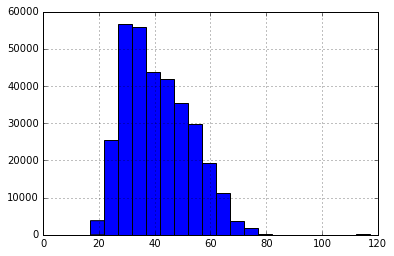

In [9]:
df['age'].hist(bins=20)

In [10]:
df['over 40'] = df['age'] > 40

In [11]:
df

,tripduration,birth year,age,over 40
0,669,1987.0,29.0,False
1,750,1968.0,48.0,True
2,663,NaN,NaN,False
3,480,1983.0,33.0,False
4,1258,1970.0,46.0,True
5,363,1983.0,33.0,False
6,187,1966.0,50.0,True
7,501,1951.0,65.0,True
8,606,1993.0,23.0,False
9,1488,1964.0,52.0,True


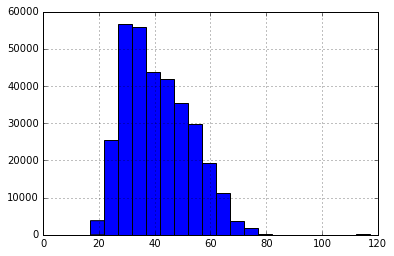

In [12]:
df['age'].hist(bins=20)


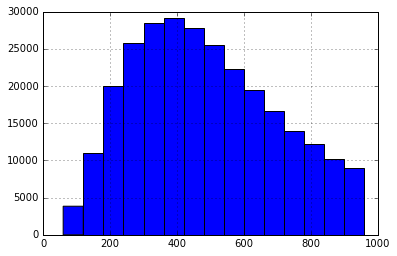

In [13]:
s = 60
df['tripduration'].hist(bins=[s, 2*s, 3*s, 4*s, 5*s, 6*s, 7*s, 8*s, 9*s, 10*s, 11*s, 12*s, 13*s, 14*s, 15*s, 16*s])

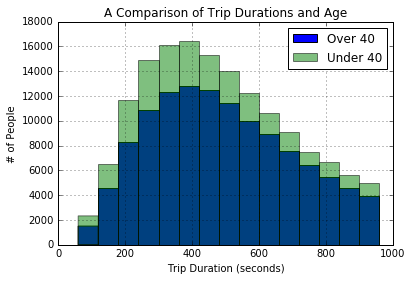

In [25]:
(df['tripduration'][df['over 40'] == True]).hist(bins=(s, 2*s, 3*s, 4*s, 5*s, 6*s, 7*s, 8*s, 9*s, 10*s, 11*s, 12*s, 13*s, 14*s, 15*s, 16*s), label="Over 40")
(df['tripduration'][df['over 40'] == False]).hist(bins=(s, 2*s, 3*s, 4*s, 5*s, 6*s, 7*s, 8*s, 9*s, 10*s, 11*s, 12*s, 13*s, 14*s, 15*s, 16*s), alpha=0.5, label="Under 40")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("# of People")
plt.title("A Comparison of Trip Durations and Age")
plt.legend()

Given the graphical analysis above, citi bike riders under 40 take more short trips vs people over 40 years of age. As trip duration in seconds imncrase both groups of citi bike riders average out. 

In [15]:
# green = young
# blue = old